In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 293 kB 663 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/Users/king/GitHub/NetWorkPython/Network_processed_data.csv")
for i in range (10):
    data = shuffle(data)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head(10)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,...,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type_backdoor,type_ddos,type_dos,type_injection,type_mitm,type_normal,type_password,type_ransomware,type_scanning,type_xss
393772,103543,4600,50859,1531,866,1,1,8292,124,2280,10,0,5,294,7,2955,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
133653,65716,4595,4693,1516,1062,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
134784,66223,4590,42185,1511,910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
156823,73821,4603,39160,1510,197,1,0,0,0,0,6,0,1,5,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,True,False
93637,47714,4590,808,1511,1036,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
335996,89755,4587,50946,1520,2134,2,0,22,558,0,6,0,2,579,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
104836,52399,4590,29953,1516,51,2,1,49,122,0,6,0,2,141,0,0,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
230023,76392,4598,107,1522,110,2,0,115089,743,0,6,0,4,878,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
175102,74542,4602,24,1514,27,1,0,15,0,0,1,0,1,2,1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,False,False,False,False,False,False,False
417411,109651,4600,38062,4343,140,1,0,0,0,0,0,0,1,1191,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False


In [6]:
#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]
train_data = data.values
test_data = data.values

#前44列的資料進行訓練
X_train = train_data[:,0:44]
X_train =X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,44:]
Y_train =Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:44]

#第5列之後為訓練目標變量
Y_test = test_data[:,44:]
Y_test =Y_test.astype(float)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("=============")
print(X_train.dtype)
print(Y_test.dtype)

(461043, 44)
(461043, 10)
(461043, 44)
(461043, 10)
float64
float64


## KNN建置

In [7]:
# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,Y_train)
# 使用訓練資料預測分類
predicted = knnModel.predict(X_train)

## 預測成功的比例

In [8]:
print('accuracy: ',knnModel.score(X_test,predicted))

accuracy:  1.0


## KFold驗證 當n_neighbor=3

In [9]:
accuracy = cross_val_score(knnModel, X_test, Y_test, cv=10, scoring="accuracy")
print(accuracy)
print(accuracy.mean()*100,'%')

[0.99214836 0.9920616  0.99212667 0.99288565 0.99203974 0.9919096
 0.99195298 0.99223495 0.991671   0.99160593]
99.20636466757267 %


## 輸出混淆矩陣

In [10]:
Y_pred = predicted

Y_pred = np.argmax(Y_pred, axis=1).astype(int)
Y_test_2 = np.argmax(Y_test, axis=1).astype(int)

from sklearn.metrics import multilabel_confusion_matrix

#row=Y_test_2 col=Y_pred
cm=confusion_matrix(Y_test_2,Y_pred)
print(cm)

[[ 19983      0      0      0      4      9      0      4      0      0]
 [    11  19745      2    239      0      3      0      0      0      0]
 [    22      3  19865     43      0      3      0      0     64      0]
 [     9    305     54  19623      0      5      0      0      4      0]
 [     9      0      0      0   1030      4      0      0      0      0]
 [    26     46      5     43      0 299271    306     12     71    220]
 [     0      0      0      0      0     88  19912      0      0      0]
 [     0      0      0      0      0     10      0  19990      0      0]
 [     9      0     54     11      0      3      0      0  19923      0]
 [     0      0      0      0      0     52      0      0      0  19948]]


## 繪製熱力圖

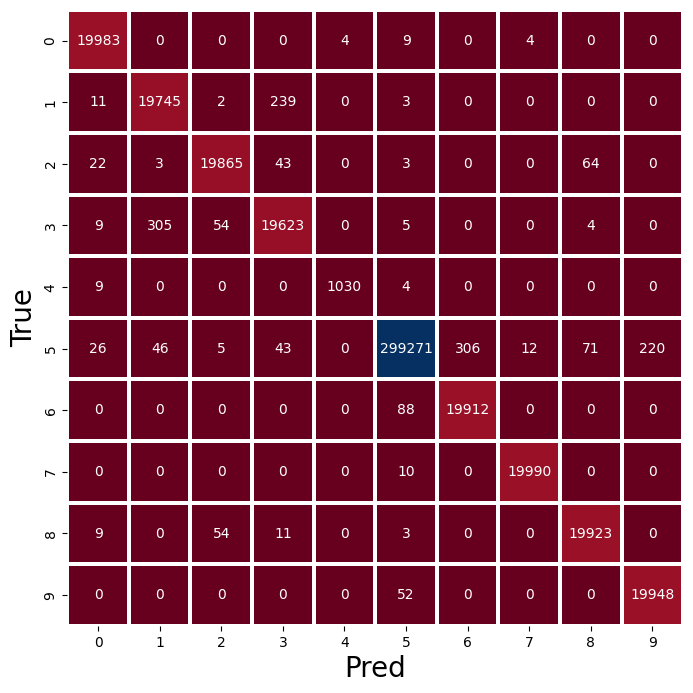

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()